In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import os
from PIL import Image
import cv2
from glob import glob


C:\Users\prath\AppData\Local\Temp\ipykernel_17500\2262208064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


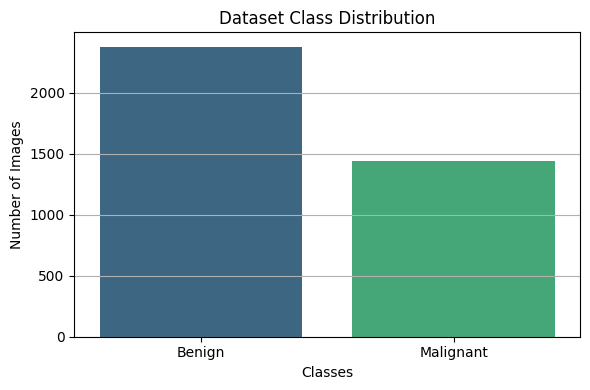

Image counts per class:
Benign: 2376 images
Malignant: 1440 images


In [9]:


# Path to your dataset
dataset_path = 'datasetji'

# Get class names (folder names)
class_names = os.listdir(dataset_path)

# Count number of images in each class
class_counts = {}
for cls in class_names:
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title('Dataset Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the counts too
print("Image counts per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")


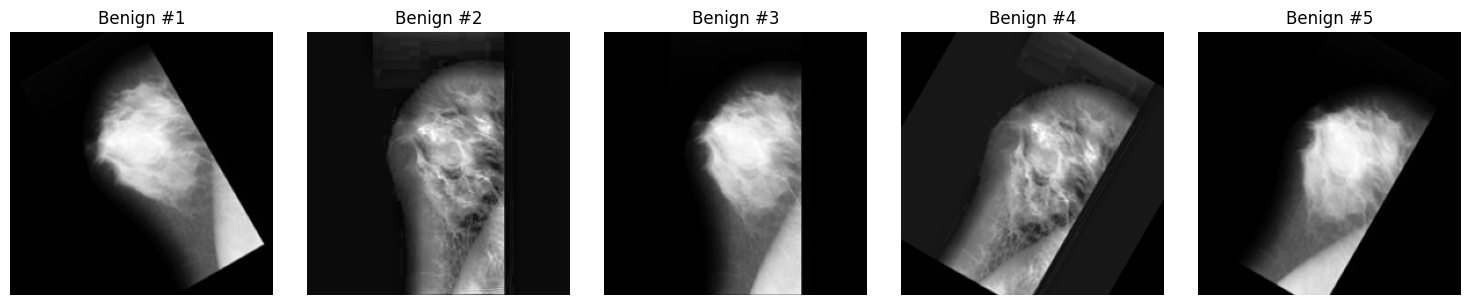

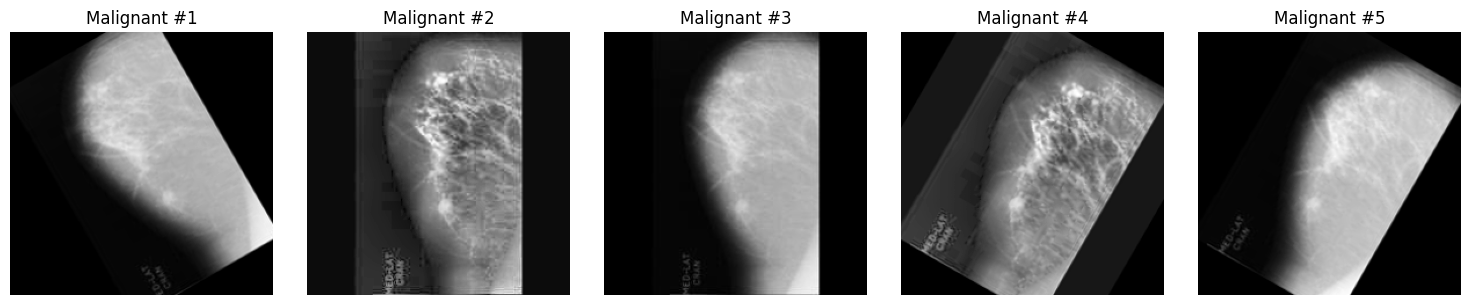

In [10]:
def show_sample_images(class_name, num_images=5):
    folder = os.path.join(dataset_path, class_name)
    files = os.listdir(folder)[:num_images]
    
    plt.figure(figsize=(15, 3))
    for idx, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, idx+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{class_name} #{idx+1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_sample_images("Benign")
show_sample_images("Malignant")


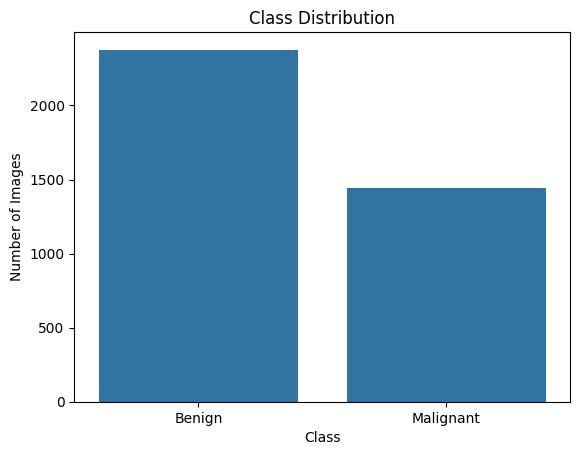

In [11]:
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()


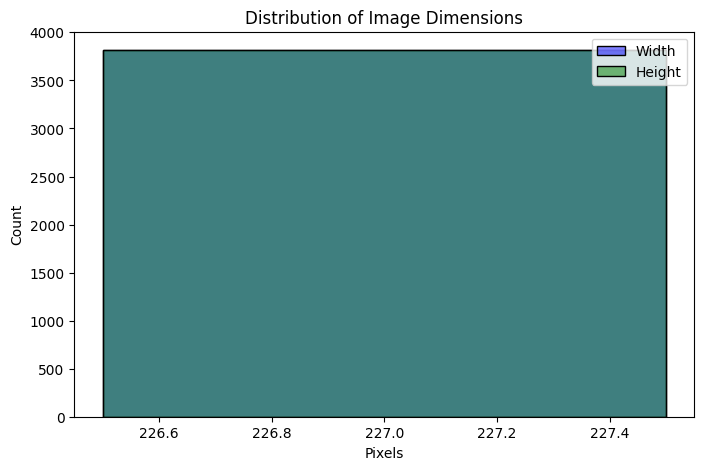

In [13]:
def get_image_sizes(class_name):
    sizes = []
    folder = os.path.join(dataset_path, class_name)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        sizes.append(img.size)
    return sizes

benign_sizes = get_image_sizes("Benign")
malignant_sizes = get_image_sizes("Malignant")

all_sizes = benign_sizes + malignant_sizes
widths, heights = zip(*all_sizes)

plt.figure(figsize=(8, 5))
sns.histplot(widths, kde=True, label='Width', color='blue')
sns.histplot(heights, kde=True, label='Height', color='green')
plt.legend()
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.show()


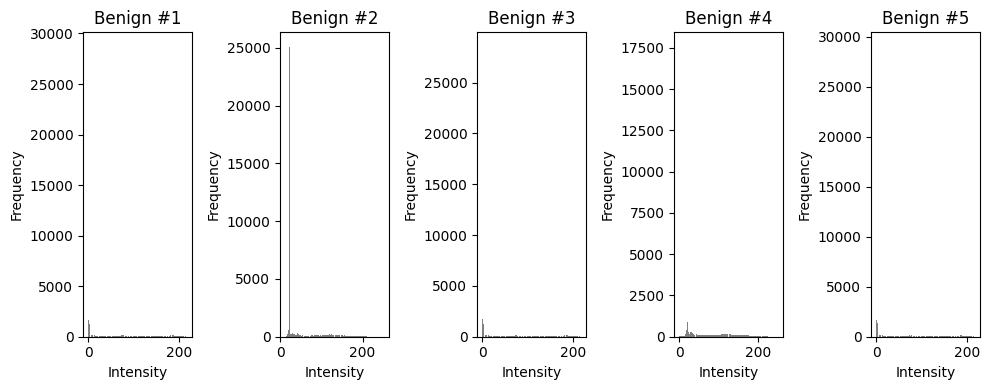

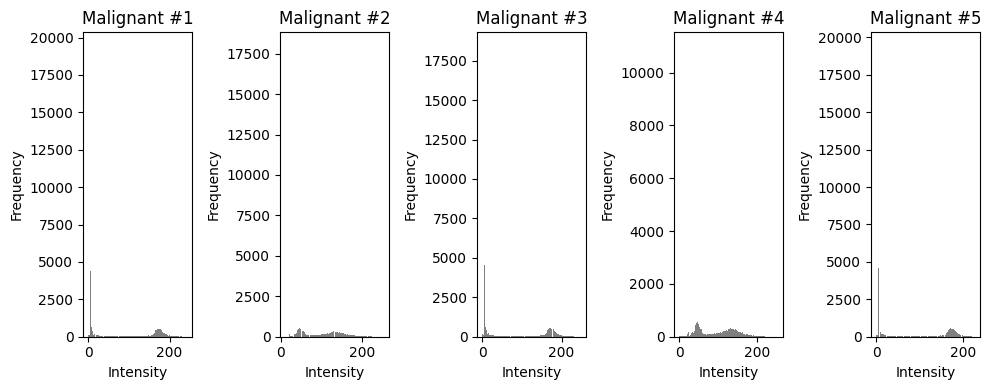

In [14]:
def plot_pixel_intensity_distribution(class_name, num_samples=5):
    folder = os.path.join(dataset_path, class_name)
    files = os.listdir(folder)[:num_samples]

    plt.figure(figsize=(10, 4))
    for idx, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, idx+1)
        plt.hist(img.ravel(), bins=256, color='gray')
        plt.title(f"{class_name} #{idx+1}")
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_pixel_intensity_distribution("Benign")
plot_pixel_intensity_distribution("Malignant")


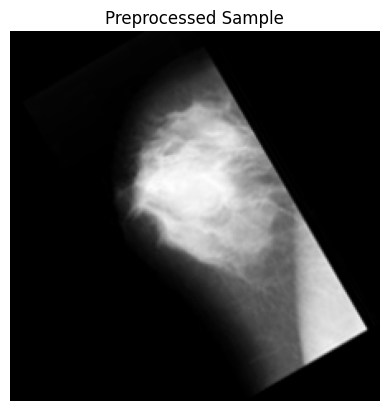

In [15]:
def preprocess_image(img_path, size=(224, 224)):
    img = Image.open(img_path).convert('L')  # Grayscale
    img = img.resize(size)
    img = np.array(img) / 255.0  # Normalize to [0,1]
    return img

# Example
sample_img = os.path.join(dataset_path, "Benign", os.listdir(os.path.join(dataset_path, "Benign"))[0])
processed = preprocess_image(sample_img)
plt.imshow(processed, cmap='gray')
plt.title("Preprocessed Sample")
plt.axis('off')
plt.show()


In [16]:
import pandas as pd

def collect_image_stats(class_name):
    folder = os.path.join(dataset_path, class_name)
    data = []
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
        data.append({
            'class': class_name,
            'mean': np.mean(img),
            'std': np.std(img),
            'min': np.min(img),
            'max': np.max(img)
        })
    return data

benign_stats = collect_image_stats("Benign")
malignant_stats = collect_image_stats("Malignant")

df_stats = pd.DataFrame(benign_stats + malignant_stats)


In [17]:
heatmap_data = df_stats.groupby('class').mean()


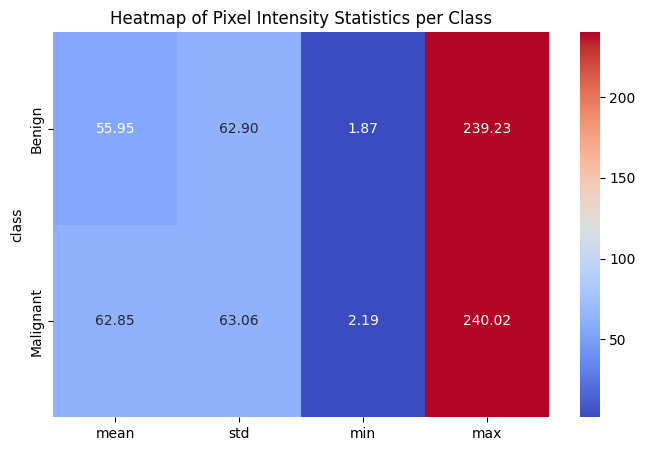

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Pixel Intensity Statistics per Class")
plt.show()
